## <font color=blue > __Data Science and Machine Learning Capstone Project__



## <font color=red > Question 3: 
    
    
### What Is the Relationship between Housing Characteristics and Complaints?
    
    
#### The goal of this exercise is to find the answer to the Question 3 of the problem statement: 

### Does the Complaint Type identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

    
 

## <font color=blue > Answer/Solution: 

## <font color=black > __Notebook Content:__
    1.  Install and import required packages for this notebook
    2.  Read and prepare the Complaints dataset
    3.  Read and prepare the Pluto dataset    
    4.  Prepare and investigate correlations between Complaints and Pluto dataset
    5.  Visulization of Pearson correlations between Complaints and Pluto addresses
    6.  Feature selection with Random forrest method
    7.  Feature importance visulization
    8.  Concluding Remarks
    
    Appendix: Pandas profiling on the Pluto housing dataset
    


## <font color=black > __1. Install and import required packages for this notebook__

In [1]:
%%capture
!pip install folium
!pip install pandas_profiling
!pip install seaborn
%matplotlib inline 


In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as mpltl
import numpy as np
import pandas_profiling
import folium

import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

np.random.seed(0)


## <font color=black > __2. Read and prepare the Complaints dataset__

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='e6a99f3d-d50b-480a-8802-9418d06a9509', project_access_token='p-48c5ead66c873a29acaf08100e965afa938bd05d')
pc = project.project_context


In [4]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-ab209614-f12a-4962-b174-6b4e1a5ede9b',
    'IBM_API_KEY_ID': '8tfXhNvghb53uzvGIwTshrKumDoIQHJ58V2dmSMcnS50',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-de.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-vfimqzgikjdisj',
    'FILE': 'fhrw-4uyv.csv'
}


In [5]:
####   The data has been downloaded from https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
####   The file was create on 13th of September 2019.
####   The instructions to "Download only the data that is related to the Department of Housing Preservation and Development." were followed.

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ebb4cba47a2749a5bb939e91483a5e2b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8tfXhNvghb53uzvGIwTshrKumDoIQHJ58V2dmSMcnS50',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ebb4cba47a2749a5bb939e91483a5e2b.get_object(Bucket='capstoneproject-donotdelete-pr-vfimqzgikjdisj',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

complaints_core_df = pd.read_csv(body,
                                 keep_date_col = True, 
                                 parse_dates = ['created_date','closed_date'],
                                 infer_datetime_format = True,
                                 keep_default_na = False, 
                                 low_memory = False)
complaints_core_df.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-11 15:54:19,43767067,SAFETY,10024,147 WEST 80 STREET,WEST 80 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.783212031338586,-73.97633377380618,NaT,RESIDENTIAL BUILDING,Open
1,2019-09-11 13:49:51,43767116,PLUMBING,11225,1585 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.66812388766437,-73.95598265878657,NaT,RESIDENTIAL BUILDING,Open
2,2019-09-11 18:42:14,43765197,SAFETY,10037,2300 5 AVENUE,5 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.815510167325854,-73.93563231275274,NaT,RESIDENTIAL BUILDING,Open
3,2019-09-11 13:50:49,43764415,DOOR/WINDOW,11233,1766 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.675743774684726,-73.92924550823487,NaT,RESIDENTIAL BUILDING,Open
4,2019-09-11 17:50:31,43765661,UNSANITARY CONDITION,10460,2116 HONEYWELL AVENUE,HONEYWELL AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.84540716646165,-73.88205336303949,NaT,RESIDENTIAL BUILDING,Open


In [3]:
####   The data has been downloaded from https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
####   The file was create on 13th of September 2019.
####   The instructions to "Download only the data that is related to the Department of Housing Preservation and Development." were followed.

complaints_core_df = pd.read_csv('/Users/sravn/Box/DATA/Py-R-K8s/CapstoneProject/V3/fhrw-4uyv.csv.gz',
                     compression = 'gzip',
                     keep_date_col = True, 
                     parse_dates = ['created_date','closed_date'],
                     infer_datetime_format = True,
                     keep_default_na = False, 
                     low_memory = False)



In [6]:
complaints_core_df.dtypes

created_date              datetime64[ns]
unique_key                         int64
complaint_type                    object
incident_zip                      object
incident_address                  object
street_name                       object
address_type                      object
city                              object
resolution_description            object
borough                           object
latitude                          object
longitude                         object
closed_date               datetime64[ns]
location_type                     object
status                            object
dtype: object

In [7]:
print(complaints_core_df.shape)
print(complaints_core_df.columns)
complaints_core_df.head()

(5854002, 15)
Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-11 15:54:19,43767067,SAFETY,10024,147 WEST 80 STREET,WEST 80 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.783212031338586,-73.97633377380618,NaT,RESIDENTIAL BUILDING,Open
1,2019-09-11 13:49:51,43767116,PLUMBING,11225,1585 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.66812388766437,-73.95598265878657,NaT,RESIDENTIAL BUILDING,Open
2,2019-09-11 18:42:14,43765197,SAFETY,10037,2300 5 AVENUE,5 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.815510167325854,-73.93563231275274,NaT,RESIDENTIAL BUILDING,Open
3,2019-09-11 13:50:49,43764415,DOOR/WINDOW,11233,1766 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.675743774684726,-73.92924550823487,NaT,RESIDENTIAL BUILDING,Open
4,2019-09-11 17:50:31,43765661,UNSANITARY CONDITION,10460,2116 HONEYWELL AVENUE,HONEYWELL AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.84540716646165,-73.88205336303949,NaT,RESIDENTIAL BUILDING,Open


In [8]:
complaints_core_df.tail()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
5853997,2019-03-25 19:59:20,42053346,PAINT/PLASTER,11415,118-65 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ADDRESS,Kew Gardens,The Department of Housing Preservation and Dev...,QUEENS,40.706561691702966,-73.83315261376306,2019-04-05 10:43:09,RESIDENTIAL BUILDING,Closed
5853998,2019-03-25 15:15:38,42053338,PAINT/PLASTER,11105,23-60 29 STREET,29 STREET,ADDRESS,Astoria,The Department of Housing Preservation and Dev...,QUEENS,40.773719633680194,-73.91550836756532,2019-03-28 11:03:54,RESIDENTIAL BUILDING,Closed
5853999,2019-03-25 19:35:11,42053305,HEAT/HOT WATER,10461,2935 WILKINSON AVENUE,WILKINSON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.85167802151147,-73.83070293065111,2019-03-27 02:07:56,RESIDENTIAL BUILDING,Closed
5854000,2019-03-25 22:32:09,42053288,HEAT/HOT WATER,10463,2834 HEATH AVENUE,HEATH AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.87350861612905,-73.90407114254262,2019-03-28 02:07:44,RESIDENTIAL BUILDING,Closed
5854001,2019-03-25 10:17:47,42053334,PAINT/PLASTER,10027,2459 FREDERICK DOUGLASS BOULEVARD,FREDERICK DOUGLASS BOULEVARD,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.81438837358141,-73.94810065784505,2019-03-27 11:12:37,RESIDENTIAL BUILDING,Closed


In [9]:
####  Create a new consoldated dataframe to be used for the merge of HEATING','HEAT/HOT WATER' 
####  complaint types that happend 1/1 2014 as show in my response to Question 1.

consolidated_complaints_core_df = complaints_core_df

consolidated_complaints_core_df['complaint_type'] = np.where(consolidated_complaints_core_df['complaint_type']=='HEATING','HEAT/HOT WATER',
                                                             consolidated_complaints_core_df['complaint_type'])

complaints_all_df = consolidated_complaints_core_df.loc[(consolidated_complaints_core_df['complaint_type']=='HEAT/HOT WATER')].copy()
complaints_all_df.shape


(2038987, 15)

In [10]:
#### 

complaints_all_df['created_year'] = complaints_all_df['created_date'].map(lambda x: x.strftime('%Y')).astype(int)
complaints_all_df['created_month'] = complaints_all_df['created_date'].map(lambda x: x.strftime('%m')).astype(int)


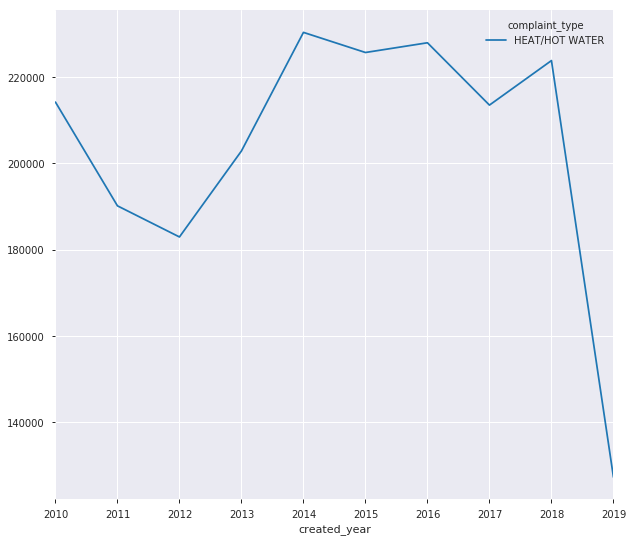

In [12]:
####   Complaints Type "HEAT/HOT WATER" combine and shows figures for full time range

fig, ax = mpltl.subplots(figsize=(10,9))
complaints_all_df.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)


In [13]:
complaints_all_df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,created_year,created_month
10,2019-09-11 15:00:15,43765015,HEAT/HOT WATER,10019,242 WEST 53 STREET,WEST 53 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.763766852193235,-73.98379874691466,NaT,RESIDENTIAL BUILDING,Open,2019,9
17,2019-09-11 16:28:25,43766427,HEAT/HOT WATER,10460,861 CROTONA PARK NORTH,CROTONA PARK NORTH,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.83956844797152,-73.8896459308585,NaT,RESIDENTIAL BUILDING,Open,2019,9
27,2019-09-11 05:35:14,43765556,HEAT/HOT WATER,11233,351 HOWARD AVENUE,HOWARD AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.67550395508911,-73.91934607921763,NaT,RESIDENTIAL BUILDING,Open,2019,9
43,2019-09-11 06:14:32,43765642,HEAT/HOT WATER,11208,702 ESSEX STREET,ESSEX STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.666496245051356,-73.87931299293909,NaT,RESIDENTIAL BUILDING,Open,2019,9
47,2019-09-11 11:27:51,43765019,HEAT/HOT WATER,11233,351 HOWARD AVENUE,HOWARD AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.67550395508911,-73.91934607921763,NaT,RESIDENTIAL BUILDING,Open,2019,9


In [14]:
complaints_all_df.tail()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,created_year,created_month
5853991,2019-03-25 16:44:13,42053304,HEAT/HOT WATER,10469,3478 FENTON AVENUE,FENTON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.87775320807253,-73.84886891043506,2019-03-27 08:52:07,RESIDENTIAL BUILDING,Closed,2019,3
5853992,2019-03-25 14:45:10,42053317,HEAT/HOT WATER,10462,2132 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.85399291289473,-73.86481720417432,2019-03-27 16:56:33,RESIDENTIAL BUILDING,Closed,2019,3
5853996,2019-03-25 06:27:04,42053292,HEAT/HOT WATER,11225,486 BROOKLYN AVENUE,BROOKLYN AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.66297298421168,-73.94559442643347,2019-03-25 21:14:17,RESIDENTIAL BUILDING,Closed,2019,3
5853999,2019-03-25 19:35:11,42053305,HEAT/HOT WATER,10461,2935 WILKINSON AVENUE,WILKINSON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.85167802151147,-73.83070293065111,2019-03-27 02:07:56,RESIDENTIAL BUILDING,Closed,2019,3
5854000,2019-03-25 22:32:09,42053288,HEAT/HOT WATER,10463,2834 HEATH AVENUE,HEATH AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.87350861612905,-73.90407114254262,2019-03-28 02:07:44,RESIDENTIAL BUILDING,Closed,2019,3


In [15]:
#### Create some dataframes on the complaints datasets - one for each Borough

complaints_BK_df = complaints_all_df.loc[(complaints_all_df['borough']=='BROOKLYN')].copy()
print ('BK  :',complaints_BK_df.shape)

complaints_BX_df = complaints_all_df.loc[(complaints_all_df['borough']=='BRONX')].copy()
print ('BX  :',complaints_BX_df.shape)

complaints_MN_df = complaints_all_df.loc[(complaints_all_df['borough']=='MANHATTAN')].copy()
print ('MN  :',complaints_MN_df.shape)

complaints_QN_df = complaints_all_df.loc[(complaints_all_df['borough']=='QUEENS')].copy()
print ('QN  :',complaints_QN_df.shape)

complaints_SI_df = complaints_all_df.loc[(complaints_all_df['borough']=='STATEN ISLAND')].copy()
print ('SI  :',complaints_SI_df.shape)

print ('All :',complaints_all_df.shape)

BK  : (542614, 17)
BX  : (569549, 17)
MN  : (398236, 17)
QN  : (228264, 17)
SI  : (17407, 17)
All : (2038987, 17)


## <font color=black > __3. Read and prepare the Pluto dataset__

In [16]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-ab209614-f12a-4962-b174-6b4e1a5ede9b',
    'IBM_API_KEY_ID': '8tfXhNvghb53uzvGIwTshrKumDoIQHJ58V2dmSMcnS50',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-de.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-vfimqzgikjdisj',
    'FILE': 'pluto_18v2_1.csv'
}


In [18]:

body = client_ebb4cba47a2749a5bb939e91483a5e2b.get_object(Bucket='capstoneproject-donotdelete-pr-vfimqzgikjdisj',Key='pluto_18v2_1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pluto_core_df = pd.read_csv(body,
                            usecols = ['borough', 'block',
                                       'zipcode', 'address','bldgarea', 'bldgdepth', 
                                       'builtfar', 'commfar', 'facilfar', 'lot', 
                                       'lotarea', 'lotdepth', 'numbldgs', 'numfloors', 
                                       'officearea', 'resarea', 'residfar', 'retailarea',
                                       'yearbuilt', 'yearalter1','zipcode','ycoord',
                                       'xcoord']
                       )
pluto_core_df.head()


,borough,block,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,...,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,BX,5641.0,670.0,NaN,CITY ISLAND AVENUE,53758.0,0.0,NaN,NaN,NaN,...,219.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1044510.0,246734.0
1,QN,3935.0,3.0,11356.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,...,113.17,25.0,1915.0,1995.0,0.29,0.50,0.0,1.0,1025679.0,227096.0
2,BX,4205.0,41.0,NaN,SEMINOLE AVENUE,2369.0,0.0,NaN,NaN,NaN,...,95.06,0.0,0.0,0.0,0.00,0.90,0.0,2.0,1026345.0,249922.0
3,BX,2402.0,14.0,NaN,EAST 156 STREET,3750.0,0.0,NaN,NaN,NaN,...,100.00,0.0,0.0,0.0,0.00,2.43,0.0,4.8,1007336.0,238351.0
4,SI,63.0,83.0,10301.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,...,105.00,30.0,1901.0,0.0,0.46,0.50,0.0,1.0,958845.0,172482.0


In [20]:
pluto_copy_df = pluto_core_df.copy()

In [21]:
pluto_copy_df.shape

(858982, 22)

In [22]:
pluto_copy_df.dtypes

borough        object
block         float64
lot           float64
zipcode       float64
address        object
lotarea       float64
bldgarea      float64
resarea       float64
officearea    float64
retailarea    float64
numbldgs      float64
numfloors     float64
lotdepth      float64
bldgdepth     float64
yearbuilt     float64
yearalter1    float64
builtfar      float64
residfar      float64
commfar       float64
facilfar      float64
xcoord        float64
ycoord        float64
dtype: object

In [23]:
pluto_copy_df.head()

,borough,block,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,...,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,BX,5641.0,670.0,NaN,CITY ISLAND AVENUE,53758.0,0.0,NaN,NaN,NaN,...,219.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1044510.0,246734.0
1,QN,3935.0,3.0,11356.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,...,113.17,25.0,1915.0,1995.0,0.29,0.50,0.0,1.0,1025679.0,227096.0
2,BX,4205.0,41.0,NaN,SEMINOLE AVENUE,2369.0,0.0,NaN,NaN,NaN,...,95.06,0.0,0.0,0.0,0.00,0.90,0.0,2.0,1026345.0,249922.0
3,BX,2402.0,14.0,NaN,EAST 156 STREET,3750.0,0.0,NaN,NaN,NaN,...,100.00,0.0,0.0,0.0,0.00,2.43,0.0,4.8,1007336.0,238351.0
4,SI,63.0,83.0,10301.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,...,105.00,30.0,1901.0,0.0,0.46,0.50,0.0,1.0,958845.0,172482.0


In [24]:
pluto_copy_df.tail()

,borough,block,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,...,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
858977,BK,7122.0,65.0,11223.0,2147 WEST 5 STREET,2000.0,1508.0,818.0,0.0,0.0,...,100.0,43.0,1940.0,0.0,0.75,1.25,0.0,2.0,990915.0,156218.0
858978,QN,2458.0,24.0,11377.0,51-19 69 PLACE,2628.0,2722.0,1980.0,0.0,0.0,...,97.5,45.0,1950.0,0.0,1.04,0.90,0.0,2.0,1013393.0,207025.0
858979,SI,7312.0,77.0,NaN,STORER AVENUE,4000.0,0.0,NaN,NaN,NaN,...,100.0,0.0,0.0,0.0,0.00,0.00,1.0,2.4,919093.0,135811.0
858980,SI,43.0,62.0,10301.0,133 WINTER AVENUE,2500.0,2146.0,2146.0,0.0,0.0,...,100.0,44.0,1920.0,0.0,0.86,0.60,0.0,1.0,960275.0,172022.0
858981,SI,4226.0,10.0,10306.0,336 ROSE AVENUE,4000.0,1144.0,1144.0,0.0,0.0,...,100.0,26.0,1945.0,0.0,0.29,0.60,0.0,1.0,952916.0,146985.0


In [25]:
pluto_copy_df['yearbuilt'].replace('', np.nan, inplace=True)
pluto_copy_df['yearalter1'].replace('', np.nan, inplace=True)
pluto_copy_df['xcoord'].replace('', np.nan, inplace=True)
pluto_copy_df['ycoord'].replace('', np.nan, inplace=True)
pluto_copy_df['lot'].replace('', np.nan, inplace=False)


pluto_all_df = pluto_copy_df.astype({"yearbuilt"    : float, 
                                     "yearalter1"   : float,
                                     "xcoord"       : float,
                                     "ycoord"       : float,
                                     "lot"          : float                                     
                                    })


In [26]:
pluto_all_df.dtypes

borough        object
block         float64
lot           float64
zipcode       float64
address        object
lotarea       float64
bldgarea      float64
resarea       float64
officearea    float64
retailarea    float64
numbldgs      float64
numfloors     float64
lotdepth      float64
bldgdepth     float64
yearbuilt     float64
yearalter1    float64
builtfar      float64
residfar      float64
commfar       float64
facilfar      float64
xcoord        float64
ycoord        float64
dtype: object

In [27]:
#### Create some dataframes on the pluto datasets - one for each Borough

pluto_BK_df = pluto_copy_df.loc[(pluto_copy_df['borough']=='BK')].copy()
print ('BK  :',pluto_BK_df.shape)
pluto_BX_df = pluto_copy_df.loc[(pluto_copy_df['borough']=='BX')].copy()
print ('BX  :',pluto_BX_df.shape)
pluto_MN_df = pluto_copy_df.loc[(pluto_copy_df['borough']=='MN')].copy()
print ('MN  :',pluto_MN_df.shape)
pluto_QN_df = pluto_copy_df.loc[(pluto_copy_df['borough']=='QN')].copy()
print ('QN  :',pluto_QN_df.shape)
pluto_SI_df = pluto_copy_df.loc[(pluto_copy_df['borough']=='SI')].copy()
print ('SI  :',pluto_SI_df.shape)

print ('ALL :',pluto_copy_df.shape)

BK  : (277028, 22)
BX  : (89825, 22)
MN  : (42897, 22)
QN  : (324554, 22)
SI  : (124672, 22)
ALL : (858982, 22)


In [28]:
pluto_copy_df.head()


,borough,block,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,...,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,BX,5641.0,670.0,NaN,CITY ISLAND AVENUE,53758.0,0.0,NaN,NaN,NaN,...,219.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1044510.0,246734.0
1,QN,3935.0,3.0,11356.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,...,113.17,25.0,1915.0,1995.0,0.29,0.50,0.0,1.0,1025679.0,227096.0
2,BX,4205.0,41.0,NaN,SEMINOLE AVENUE,2369.0,0.0,NaN,NaN,NaN,...,95.06,0.0,0.0,0.0,0.00,0.90,0.0,2.0,1026345.0,249922.0
3,BX,2402.0,14.0,NaN,EAST 156 STREET,3750.0,0.0,NaN,NaN,NaN,...,100.00,0.0,0.0,0.0,0.00,2.43,0.0,4.8,1007336.0,238351.0
4,SI,63.0,83.0,10301.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,...,105.00,30.0,1901.0,0.0,0.46,0.50,0.0,1.0,958845.0,172482.0


#### <font color=green > __Findings:__
#### <font color=green > The Pluto dataset seems to have missing values in yearbuilt and yearalter1, and yearalter2
#### <font color=green > The Pluto data has a potential poor quality data issue with lots of 0 values either as a flag or indicating no value entered/available. 
#### <font color=green > Adjust the year values to be the number of years since being built or altered and remove the original columns.

In [29]:
pluto_copy_df['build_age']=pluto_copy_df['yearbuilt']
pluto_copy_df['altered']=pluto_copy_df['yearalter1']
pluto_copy_df['build_age']=pluto_copy_df['build_age'].apply(lambda x: 100 if x==2019 else x)
pluto_copy_df['altered']=pluto_copy_df['altered'].apply(lambda x: 100 if x==2019 else x)
pluto_copy_df.drop(['yearbuilt',
                   'yearalter1'],
                    axis = 1,
                    inplace = True)


In [30]:
print(pluto_copy_df.shape)
pluto_copy_df.head()


(858982, 22)


,borough,block,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,...,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,xcoord,ycoord,build_age,altered
0,BX,5641.0,670.0,NaN,CITY ISLAND AVENUE,53758.0,0.0,NaN,NaN,NaN,...,219.00,0.0,0.00,0.00,0.0,0.0,1044510.0,246734.0,0.0,0.0
1,QN,3935.0,3.0,11356.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,...,113.17,25.0,0.29,0.50,0.0,1.0,1025679.0,227096.0,1915.0,1995.0
2,BX,4205.0,41.0,NaN,SEMINOLE AVENUE,2369.0,0.0,NaN,NaN,NaN,...,95.06,0.0,0.00,0.90,0.0,2.0,1026345.0,249922.0,0.0,0.0
3,BX,2402.0,14.0,NaN,EAST 156 STREET,3750.0,0.0,NaN,NaN,NaN,...,100.00,0.0,0.00,2.43,0.0,4.8,1007336.0,238351.0,0.0,0.0
4,SI,63.0,83.0,10301.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,...,105.00,30.0,0.46,0.50,0.0,1.0,958845.0,172482.0,1901.0,0.0


## <font color=black > __4.  Prepare and investigate correlations between Complaints and Pluto datasets__

In [31]:
print(complaints_all_df.columns)
print(pluto_copy_df.columns)
all_complaints_count = len(complaints_all_df)

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status', 'created_year',
       'created_month'],
      dtype='object')
Index(['borough', 'block', 'lot', 'zipcode', 'address', 'lotarea', 'bldgarea',
       'resarea', 'officearea', 'retailarea', 'numbldgs', 'numfloors',
       'lotdepth', 'bldgdepth', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'xcoord', 'ycoord', 'build_age', 'altered'],
      dtype='object')


In [32]:
target_compare_all_df = pluto_copy_df[['address']].isin(complaints_all_df['incident_address'].unique())
print(' ALL : ',target_compare_all_df['address'].sum())
target_compare_all_df = (target_compare_all_df['address'])*1
target_compare_all_df.dtypes

target_compare_BX_df = pluto_BX_df[['address']].isin(complaints_BX_df['incident_address'].unique())
print(' BX  : ',target_compare_BX_df['address'].sum())
target_compare_BX_df = (target_compare_BX_df['address'])*1
target_compare_BX_df.dtypes

target_compare_BK_df = pluto_BK_df[['address']].isin(complaints_BK_df['incident_address'].unique())
print(' BK  : ',target_compare_BK_df['address'].sum())
target_compare_BK_df = (target_compare_BK_df['address'])*1
target_compare_BK_df.dtypes

target_compare_MN_df = pluto_MN_df[['address']].isin(complaints_MN_df['incident_address'].unique())
print(' MN  : ',target_compare_MN_df['address'].sum())
target_compare_MN_df = (target_compare_MN_df['address'])*1
target_compare_MN_df.dtypes

target_compare_QN_df = pluto_QN_df[['address']].isin(complaints_QN_df['incident_address'].unique())
print(' QN  : ',target_compare_QN_df['address'].sum())
target_compare_QN_df = (target_compare_QN_df['address'])*1
target_compare_QN_df.dtypes

target_compare_SI_df = pluto_SI_df[['address']].isin(complaints_SI_df['incident_address'].unique())
print(' SI  : ',target_compare_SI_df['address'].sum())
target_compare_SI_df = (target_compare_SI_df['address'])*1
target_compare_SI_df.dtypes

 ALL :  105228
 BX  :  16900
 BK  :  35827
 MN  :  13454
 QN  :  23661
 SI  :  2969


dtype('int64')

In [33]:
pluto_copy_df.loc[:,'target'] = target_compare_all_df
pluto_BX_df.loc[:,'target'] = target_compare_BX_df
pluto_BK_df.loc[:,'target'] = target_compare_BK_df
pluto_MN_df.loc[:,'target'] = target_compare_MN_df
pluto_QN_df.loc[:,'target'] = target_compare_QN_df
pluto_SI_df.loc[:,'target'] = target_compare_SI_df
pluto_copy_df.head()


,borough,block,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,...,bldgdepth,builtfar,residfar,commfar,facilfar,xcoord,ycoord,build_age,altered,target
0,BX,5641.0,670.0,NaN,CITY ISLAND AVENUE,53758.0,0.0,NaN,NaN,NaN,...,0.0,0.00,0.00,0.0,0.0,1044510.0,246734.0,0.0,0.0,0
1,QN,3935.0,3.0,11356.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,...,25.0,0.29,0.50,0.0,1.0,1025679.0,227096.0,1915.0,1995.0,0
2,BX,4205.0,41.0,NaN,SEMINOLE AVENUE,2369.0,0.0,NaN,NaN,NaN,...,0.0,0.00,0.90,0.0,2.0,1026345.0,249922.0,0.0,0.0,0
3,BX,2402.0,14.0,NaN,EAST 156 STREET,3750.0,0.0,NaN,NaN,NaN,...,0.0,0.00,2.43,0.0,4.8,1007336.0,238351.0,0.0,0.0,0
4,SI,63.0,83.0,10301.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,...,30.0,0.46,0.50,0.0,1.0,958845.0,172482.0,1901.0,0.0,0


In [34]:
print (pluto_copy_df.shape)
pluto_copy_df = pluto_copy_df.dropna(axis = 0, how ='any')
print (pluto_copy_df.shape)

(858982, 23)
(805942, 23)


In [35]:
target_df = pluto_copy_df[['address']].isin(complaints_all_df['incident_address'].unique())
print(target_df['address'].sum())
target_df = (target_df['address'])*1
target_df.dtypes


103655


dtype('int64')

In [36]:
pluto_copy_df.loc[:,'target'] = target_df
pluto_copy_df.head()

,borough,block,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,...,bldgdepth,builtfar,residfar,commfar,facilfar,xcoord,ycoord,build_age,altered,target
1,QN,3935.0,3.0,11356.0,8-03 117 STREET,10870.0,3130.0,3130.0,0.0,0.0,...,25.0,0.29,0.50,0.0,1.0,1025679.0,227096.0,1915.0,1995.0,0
4,SI,63.0,83.0,10301.0,216 FRANKLIN AVENUE,3465.0,1590.0,1590.0,0.0,0.0,...,30.0,0.46,0.50,0.0,1.0,958845.0,172482.0,1901.0,0.0,0
6,BX,5825.0,1502.0,10471.0,5102 POST ROAD,7619.0,3738.0,3738.0,0.0,0.0,...,59.0,0.49,0.90,0.0,2.0,1012526.0,265726.0,2005.0,0.0,0
8,BK,7118.0,37.0,11223.0,2168 WEST 8 STREET,2312.0,1984.0,1984.0,0.0,0.0,...,40.0,0.86,1.25,0.0,2.0,989959.0,155927.0,1920.0,0.0,0
10,QN,9152.0,28.0,11417.0,107-46 90 STREET,2002.0,1024.0,1024.0,0.0,0.0,...,34.0,0.51,0.90,0.0,2.0,1026523.0,185958.0,1925.0,0.0,0


## <font color=black >  __5.  Visulization of Pearson correlations between Complaints and Pluto addresses__ 

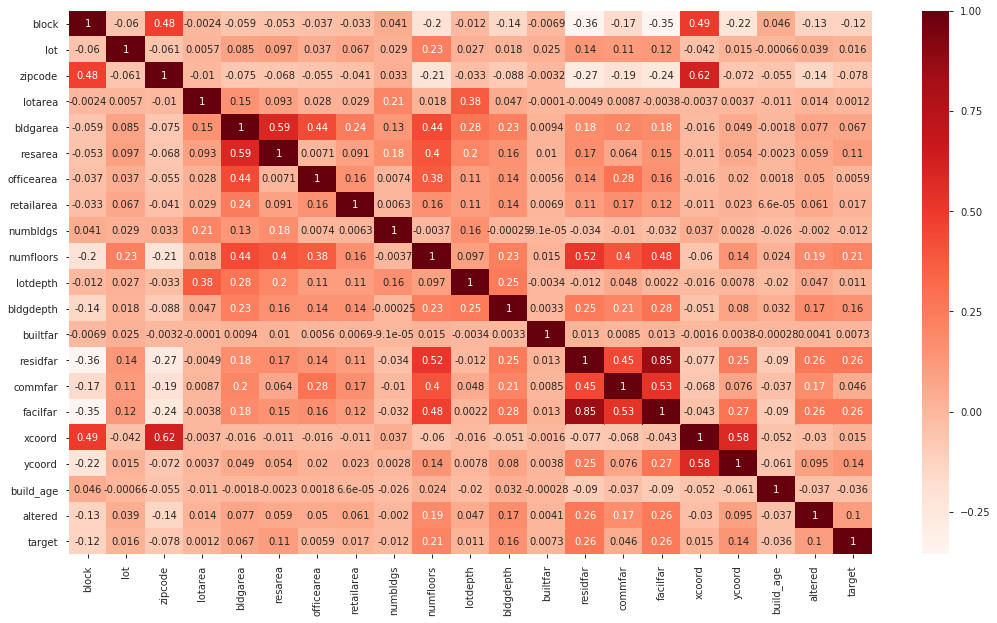

In [37]:
# Make a Pearson correlation between the Complaints and Pluto addresses 
plt.figure(figsize=(18,10))
cor = pluto_copy_df.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.Reds)
plt.show()

In [38]:
# Correlation with output variable
cor_target = abs(cor["target"])
# Selecting highly correlated features. Here I set the threshold to be 0.2
relevant_features = cor_target[cor_target > 0.2]
relevant_features


numfloors    0.211033
residfar     0.263719
facilfar     0.255484
target       1.000000
Name: target, dtype: float64

In [39]:
print(pluto_copy_df[["residfar","facilfar", "numfloors"]].corr())

           residfar  facilfar  numfloors
residfar   1.000000  0.852991   0.515015
facilfar   0.852991  1.000000   0.476497
numfloors  0.515015  0.476497   1.000000


In [40]:
print(pluto_copy_df[["residfar","facilfar"]].corr())

          residfar  facilfar
residfar  1.000000  0.852991
facilfar  0.852991  1.000000


In [41]:
important_feature = ['bldgdepth', 'numfloors', 'residfar', 'zipcode','target']
df_selected_feature = pluto_copy_df[important_feature]
df_selected_feature.head()

,bldgdepth,numfloors,residfar,zipcode,target
1,25.0,2.5,0.50,11356.0,0
4,30.0,2.5,0.50,10301.0,0
6,59.0,3.0,0.90,10471.0,0
8,40.0,2.0,1.25,11223.0,0
10,34.0,2.0,0.90,11417.0,0


## __6. Feature selection with Random forrest method__

In [42]:
# data for features set and target

X = pluto_copy_df.drop([ "borough","address", "target", "xcoord", "ycoord"],1)
y = pluto_copy_df["target"]

# feature labels
feat_labels = list(X.columns)

# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state=0)


In [43]:
X.head()

,block,lot,zipcode,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,build_age,altered
1,3935.0,3.0,11356.0,10870.0,3130.0,3130.0,0.0,0.0,1.0,2.5,113.17,25.0,0.29,0.50,0.0,1.0,1915.0,1995.0
4,63.0,83.0,10301.0,3465.0,1590.0,1590.0,0.0,0.0,1.0,2.5,105.00,30.0,0.46,0.50,0.0,1.0,1901.0,0.0
6,5825.0,1502.0,10471.0,7619.0,3738.0,3738.0,0.0,0.0,1.0,3.0,101.58,59.0,0.49,0.90,0.0,2.0,2005.0,0.0
8,7118.0,37.0,11223.0,2312.0,1984.0,1984.0,0.0,0.0,1.0,2.0,115.58,40.0,0.86,1.25,0.0,2.0,1920.0,0.0
10,9152.0,28.0,11417.0,2002.0,1024.0,1024.0,0.0,0.0,1.0,2.0,100.08,34.0,0.51,0.90,0.0,2.0,1925.0,0.0


In [44]:
feat_labels

['block',
 'lot',
 'zipcode',
 'lotarea',
 'bldgarea',
 'resarea',
 'officearea',
 'retailarea',
 'numbldgs',
 'numfloors',
 'lotdepth',
 'bldgdepth',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'build_age',
 'altered']

In [45]:
print(X_train)


          block    lot  zipcode   lotarea  bldgarea  resarea  officearea  \
117434  13304.0   15.0  11434.0    5000.0    2940.0   2940.0         0.0   
494596   7632.0    9.0  11210.0    2000.0    1235.0   1235.0         0.0   
187386   3237.0  153.0  10468.0    3180.0    2629.0   2629.0         0.0   
245149   3215.0   24.0  11221.0    2375.0    2750.0   1375.0         0.0   
233399   1105.0   67.0  11215.0    1800.0    2160.0   1440.0         0.0   
540438   5687.0   14.0  11219.0    2579.0    3575.0   2600.0         0.0   
2418     6728.0  120.0  10309.0    2014.0    2058.0   2058.0         0.0   
824069   4262.0   42.0  10306.0    1612.0    1256.0   1256.0         0.0   
50221    8255.0   16.0  11236.0    2300.0    1800.0   1800.0         0.0   
752854  13747.0   14.0  11422.0    4000.0    2400.0   2400.0         0.0   
289649   9060.0   15.0  11416.0    5000.0    1216.0   1216.0         0.0   
292688   3254.0   50.0  10305.0    4000.0    2400.0   2400.0         0.0   
604760  1583

In [46]:
print(X_test)

          block     lot  zipcode    lotarea  bldgarea   resarea  officearea  \
128250   9200.0    62.0  11418.0     5000.0    2474.0    2474.0         0.0   
298075  10572.0     6.0  11427.0     3781.0    1809.0    1809.0         0.0   
103082   6881.0    28.0  11214.0     2449.0    1540.0     880.0         0.0   
803335   7612.0    59.0  11210.0     4200.0    2425.0    2425.0         0.0   
197867   1616.0    10.0  10314.0     2790.0    1380.0    1380.0         0.0   
778495  15459.0     3.0  11693.0     7122.0    1540.0    1540.0         0.0   
470315   5145.0    55.0  11355.0    40513.0  130326.0  129300.0         0.0   
427574   1538.0    46.0  11233.0    11200.0   22400.0       0.0     22400.0   
316492   1041.0    23.0  11370.0     3467.0    3043.0    2202.0         0.0   
384264   4685.0    18.0  11357.0     3000.0    1640.0    1640.0         0.0   
211697    805.0   122.0  10314.0     4000.0    2280.0    2280.0         0.0   
215972   2631.0    36.0  11378.0     2650.0    2750.

In [47]:
# feature scaling

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [48]:
# Create a random forest classifier
clf = RandomForestClassifier(random_state = 0, 
                             n_jobs = 2)

# Train the classifier
clf.fit(X_train, y_train)

importances = clf.feature_importances_

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('block', 0.08975662736615983)
('lot', 0.16179022704637677)
('zipcode', 0.04577944548176722)
('lotarea', 0.06708620526332731)
('bldgarea', 0.09822273826159617)
('resarea', 0.13371067609844295)
('officearea', 0.005437301806880085)
('retailarea', 0.014814281540248525)
('numbldgs', 0.012427644611991232)
('numfloors', 0.02172877366768887)
('lotdepth', 0.04503706518374573)
('bldgdepth', 0.0747703888646808)
('builtfar', 0.09917047920308822)
('residfar', 0.029174843698952922)
('commfar', 0.005579935035885163)
('facilfar', 0.020656962616679535)
('build_age', 0.05685560427111473)
('altered', 0.018000799981373907)


In [49]:
print(importances)

[0.08975663 0.16179023 0.04577945 0.06708621 0.09822274 0.13371068
 0.0054373  0.01481428 0.01242764 0.02172877 0.04503707 0.07477039
 0.09917048 0.02917484 0.00557994 0.02065696 0.0568556  0.0180008 ]


## __7. Feature importance visulization__

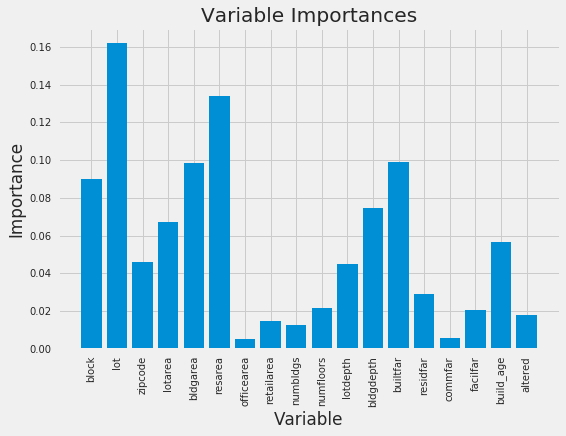

In [51]:
# Set the style
mpltl.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
mpltl.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
mpltl.xticks(x_values, feat_labels, rotation = 'vertical')
# Axis labels and title
mpltl.ylabel('Importance'); 
mpltl.xlabel('Variable'); 
mpltl.title('Variable Importances');

## 8.  __Concluding Remarks__

<font color=Red>
    
### Question 3:
<font color=black>
    
#### What Is the Relationship between Housing Characteristics and Complaints?
    
    
#### Does the Complaint Type identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

<font color=green>

### Answers:

__As found in my notebook response to Question 1, the "HEAT/HOT WATER" complaint type was created at start of year 2014 but are the topmost often complaint type.__

__I have merged the "HEATING" and "HEAT/HOT WATER" to be able to get to full list of complaints from 2010 to 13th of September 2019.__   
    
__The implemented Pearson correlation predicts that 'bldgdepth', 'resifar', 'numfloors', 'zipcode' are the important features. The accuracy score of the covariance shows that using these important features have approx. 85% accuracy.__

__And then shown in Chapter 6 & 7 using the Random Forest method gives 'bldgarea', 'bldgdepth', 'builtfar', 'lot', 'lotarea', 'resarea', 'yearbuilt', 'zipcode' as important features shown in the bar chart.__ 


__By using these two methods we are confident that the model is good enough to use for prediction for the sample data and detect the correct housing characteristics that are highly correlated to complaint type.__

__The notebook was original prepared to run the analyses for each or individual Boroughs - but shown in the analyses I have run it against the full dataset.__

__By running the same analysis against the individual Boroughs and compare the results to see if there would be differences between the complaints and housing characteristics would be a proposed next step to investigate for the Department of Housing Preservation and Development of New York City authorities which could  help understand potential different patterns of complaints and housing types.__

__Another valuable insight could also be archived with a report on the Pluto data using pandas_profiling.__

## Appendix:  __Pandas profiling on the Pluto housing dataset__

<font color=Blue>

In [ ]:
profile = pandas_profiling.ProfileReport(pluto_copy_df)
display(profile)